# Data Science - Python and Pandas


## Table of Content

1. [Introduction](#introduction)<br>
1.1. [Series and DataFrames](#series)<br>
1.2. [Indexing](#index)<br>
1.3. [Data Selection](#selection)<br>
2. [Transform data](#transform)<br>
2.1. [Adding and deleting columns](#columns)<br>
2.2. [Cleaning Data](#cleaning)<br>
2.3. [Merging Data](#merging)<br>
2.4. [Grouping Data](#grouping)<br>
3. [Visualise data](#visualise)<br>
4. [Optional Excercises](#extra)<br>



Let's start with loading the packages and a quick look at some data. Select the below cell by clicking on it, and then click on the `Run` button at the top of the notebook (or use `Shift+Enter`). This is how you can run all code cells in this notebook. The numbers in front of the cells tell you in which order you have run them, for instance `[1]`. When you see a `[*]` the cell is currently running and `[]` means you have not run the cell yet. 

In [1]:
import numpy as np
import pandas as pd

Loading data from Cloud Object Store (COS) is done by adding the `measurements.csv` file in the menu on the right of the notebook (if you see no menu, click the `1010` button at the top first). 

- Activate the below cell, move the cursor to the empty line under `# add data`
- Click on `Insert to code` under the file from the right menu
- Select `Insert pandas DataFrame`
- Code to load the file will be inserted
- Change the default name of the data from `df_data_1` to `jeans` at the bottom two rows of the inserted code

In [2]:
# add data


In [3]:
# If you want to  run this notebook locally use:
jeans = pd.read_csv('jeans_measurements.csv')

Now let's have a look at the data that has been loaded into the notebook. Use `jeans`, `jeans.head()` or `jeans.tail()` to see different parts of the table and `jeans.dtypes` to see which variables there are and what datatype they have. Add a number between the brackets `()` to specify how many lines you want to display.

> _Tip_: If you want to run these in separate cells, activate the below cell by clicking on it and then click on the `+` at the top of the notebook. This will add extra cells. Click on the upwards and downwards arrows to move the cells up and down to change their order. 

In [4]:
jeans

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout
0,Arizona,skinny,women,Fave Super Skinny,"78% cotton, 20% polyester, 2% spandex",42.00,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,False
1,Arizona,straight,women,Perfect Boot,"78% cotton, 20% polyester, 2% spandex",42.00,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,False
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.50,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,False
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.50,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,False
4,Uniqlo,skinny,women,Skinny Fit,"87% cotton, 9% polyester, 4% spandex",39.90,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,False
5,Uniqlo,straight,women,High-Rise Straight,"98% cotton, 2% spandex",39.90,15.5,12.0,6.5,16.5,12.5,14.5,12.5,12.5,11.5,True
6,Calvin Klein,skinny,women,Midrise Skinny,"98% cotton, 2% elastane",79.50,12.0,12.0,6.5,14.5,12.0,16.5,13.7,13.0,12.0,False
7,Calvin Klein,straight,women,Straight,"85% cotton, 13% poly, 2% elastane",69.50,14.0,11.2,6.5,15.5,12.0,15.0,12.0,14.0,12.5,False
8,Lucky,skinny,women,Ava Mid Rise Skinny,"69% cotton, 21% polyester, 8% modal, 2% elastane",99.00,13.0,14.5,6.0,13.5,12.7,16.0,12.7,14.5,12.5,False
9,Lucky,straight,women,Sweet Boot,"96% cotton, 3% other fiber, 1% elastane",79.50,15.0,16.5,5.5,15.5,12.2,14.5,12.7,13.0,11.0,False


<div class="alert alert-success">
 <b>EXERCISE</b> <br/> 
 Explore the following commands:
  <ul>
  <li><font face="Courier">jeans.columns</font></li>
  <li><font face="Courier">jeans.values</font></li>
  <li><font face="Courier">jeans.shape</font></li>
  <li><font face="Courier">len(jeans)</font></li>
  
 </ul> 
</div>  

In [5]:
# try the commands here (add as many cells as you need):


<a id="introduction"></a>
## 1. Introduction

The Python package you used to read this file and look at some of it's properties is [Pandas](https://pandas.pydata.org/), which is an open source library with easy-to-use data structures and data analysis tools. 

<div class="alert alert-info" style="font-size:100%">
<b>Read this <a href="http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html">10 minute introduction</a> for a quick overview of Pandas.<br>
</div>

<a id="series"></a>
### 1.1 Series and DataFrames 

Let's go through some of the basics of Pandas before going back to the Jeans dataset. Pandas has two main data structures: `Series` and `DataFrames`. 

A `Series` is a list of values with an integer index. The first column is the index (the default starts at 0) and the second column the values.

In [6]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

 A `DataFrame` is similar, but has multiple columns. You can create one in many ways, by loading a file or from for example a NumPy array and a date for the index. (We come back to the index and dates later) 


<div class="alert alert-info" style="font-size:100%">
<b>Read this <a href="https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html"> tutorial</a> for an overview of NumPy.<br>
</div>

Two examples:

In [7]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
numbers = np.random.randn(6, 4)
numbers

array([[-0.84822501, -0.53796607, -0.05189353,  0.43317011],
       [ 0.37493338, -2.25917937,  0.26722334, -2.18838727],
       [-0.33194317,  2.2178227 , -0.17431631, -1.89738793],
       [-0.13509426,  1.0499732 ,  0.45561369,  1.82409832],
       [ 1.98450102,  0.56723002, -0.52924054, -0.56395394],
       [-1.49716642, -0.94010267, -0.37132138,  1.72291356]])

In [9]:
df = pd.DataFrame(numbers, index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.848225,-0.537966,-0.051894,0.433170
2013-01-02,0.374933,-2.259179,0.267223,-2.188387
2013-01-03,-0.331943,2.217823,-0.174316,-1.897388
2013-01-04,-0.135094,1.049973,0.455614,1.824098
2013-01-05,1.984501,0.567230,-0.529241,-0.563954
2013-01-06,-1.497166,-0.940103,-0.371321,1.722914


In [10]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})

In [11]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


To find out what the data type is of a variable use `type()`: 

In [12]:
print('Data type of s is '+str(type(s)))
print('Data type of s is '+str(type(dates)))
print('Data type of s is '+str(type(numbers)))
print('Data type of df is '+str(type(df)))

Data type of s is <class 'pandas.core.series.Series'>
Data type of s is <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Data type of s is <class 'numpy.ndarray'>
Data type of df is <class 'pandas.core.frame.DataFrame'>


In [13]:
type(jeans)

pandas.core.frame.DataFrame

<a id="index"></a>
### 1.2 Indexing 

It is important to understand the `index` to work with dataframes, so let's explore this a little further. 

For this we will create a new DataFrame with the population of the 5 largest cities in the UK ([source](https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom)). `data` is a [dictionary](https://realpython.com/python-dicts/).

In [14]:
data = {'city':       ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'population': [9787426,  2553379,     2440986,    1777934,1209143],
        'area':       [1737.9,   630.3,       598.9,      487.8,  368.5 ]}
cities = pd.DataFrame(data)
cities

,city,population,area
0,London,9787426,1737.9
1,Manchester,2553379,630.3
2,Birmingham,2440986,598.9
3,Leeds,1777934,487.8
4,Glasgow,1209143,368.5


In [15]:
cities.columns

Index(['city', 'population', 'area'], dtype='object')

In [16]:
cities.index

RangeIndex(start=0, stop=5, step=1)

In [17]:
cities = cities.set_index('city')
cities

,population,area
city,,
London,9787426,1737.9
Manchester,2553379,630.3
Birmingham,2440986,598.9
Leeds,1777934,487.8
Glasgow,1209143,368.5


In [18]:
cities = cities.reset_index()
cities = cities.set_index(['city','population'])
cities

,,area
city,population,
London,9787426,1737.9
Manchester,2553379,630.3
Birmingham,2440986,598.9
Leeds,1777934,487.8
Glasgow,1209143,368.5


In [19]:
cities = cities.reset_index()
cities = cities.set_index('city')
cities

,population,area
city,,
London,9787426,1737.9
Manchester,2553379,630.3
Birmingham,2440986,598.9
Leeds,1777934,487.8
Glasgow,1209143,368.5


<a id="selection"></a>
### 1.3 Data Selection

Select a single label or a range of labels with `.loc[]` (This only works for the column that was set to the index):

In [20]:
cities.loc['London', 'area']

1737.9

In [21]:
cities.loc['Manchester':'Leeds', ['area', 'population']]

,area,population
city,,
Manchester,630.3,2553379
Birmingham,598.9,2440986
Leeds,487.8,1777934


Or select by position with `.iloc[]`. You can select a single row, multiple rows (or columns) at particular positions in the index, it only takes integers:

In [22]:
cities.iloc[0]

population    9787426.0
area             1737.9
Name: London, dtype: float64

In [23]:
cities.iloc[:,1]

city
London        1737.9
Manchester     630.3
Birmingham     598.9
Leeds          487.8
Glasgow        368.5
Name: area, dtype: float64

In [24]:
cities.iloc[:,0:2]

,population,area
city,,
London,9787426,1737.9
Manchester,2553379,630.3
Birmingham,2440986,598.9
Leeds,1777934,487.8
Glasgow,1209143,368.5


In [25]:
cities.iloc[2:4,0:2]

,population,area
city,,
Birmingham,2440986,598.9
Leeds,1777934,487.8


You can also use one or more column names to create a new DataFrame.

In [26]:
cities['area']

city
London        1737.9
Manchester     630.3
Birmingham     598.9
Leeds          487.8
Glasgow        368.5
Name: area, dtype: float64

In [27]:
cities2 = cities[['area','population']]
cities2

,area,population
city,,
London,1737.9,9787426
Manchester,630.3,2553379
Birmingham,598.9,2440986
Leeds,487.8,1777934
Glasgow,368.5,1209143


#### Filtering

Selecting rows based on a certain condition can be done with Boolean indexing:

In [28]:
cities['area'] > 500

city
London         True
Manchester     True
Birmingham     True
Leeds         False
Glasgow       False
Name: area, dtype: bool

If you want to select the data add `cities[]` around the above:

In [29]:
cities[cities['area'] > 500]

,population,area
city,,
London,9787426,1737.9
Manchester,2553379,630.3
Birmingham,2440986,598.9


Combining different columns using `&`, `|` and `==` is also possible"

In [30]:
cities[(cities['area'] > 500) & (cities['population'] > 2500000)]

,population,area
city,,
London,9787426,1737.9
Manchester,2553379,630.3


In [31]:
cities[(cities['area'] < 500) | (cities['population'] < 1000000)]

,population,area
city,,
Leeds,1777934,487.8
Glasgow,1209143,368.5


In [32]:
cities[cities['area'] == 487.8] 

,population,area
city,,
Leeds,1777934,487.8


<div class="alert alert-success">
 <b>EXERCISE</b> <br/> 
 Using the jeans DataFrame:
  <ul>
  <li>Find the most expensive jeans</li>  
  <li>Find the cheapest jeans</li>
  <li>What is the difference in price between the cheapest and most expensive jeans?</li>    
 </ul>  
</div>  

> *Tips*: 
- Find the maximum of a row with for instance `jeans['price'].max()` 
- Extract the value from a cell in a DataFrame with `.value[]`
- To see the answer uncomment the line in the cells that contains `%load` (by deleting the `#`) and then run the cell, but try to find your own solution first in the cell above the solution!

In [33]:
# most expensive jeans


In [34]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer1.py

In [35]:
# cheapest jeans


In [36]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer2.py

In [37]:
# difference in price


In [38]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer3.py

<a id="transform"></a>
## 2. Transform Data

When looking at data there are always transformations needed to get it in the format you need for your analysis, visualisations or models. 

These are a few examples of the endless possibilities. The best way to learn is to find a dataset and try to answer questions with the data. The pandas documentation is real good, and on StackOverflow there is almost always someone who asked the same question already. 

<a id="columns"></a>
### 2.1 Adding and deleting columns
Adding a column can be done by defining a new column, which can then be dropped with 'drop'. 

In [39]:
jeans['new'] = 1
jeans = jeans.drop(columns=['new'])

In [40]:
jeans['avgHeightFront'] = (jeans.maxHeightFront + jeans.minHeightFront) / 2

In [41]:
jeans.head()

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout,avgHeightFront
0,Arizona,skinny,women,Fave Super Skinny,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,False,14.75
1,Arizona,straight,women,Perfect Boot,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,False,14.25
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,False,13.25
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,False,13.25
4,Uniqlo,skinny,women,Skinny Fit,"87% cotton, 9% polyester, 4% spandex",39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,False,13.00


<a id="cleaning"></a>
### 2.2 Cleaning Data

Things to check:

- Is the data tidy: each variable forms a column, each observation forms a row and  each type of observational unit forms a table.
- Are all columns in the right data format?
- Are there missing values?
- Are there unrealistic outliers?

Get a quick overview of the numeric data with `.describe()`. If any of the numeric columns is missing this is a probably because of a wring data type. 


In [42]:
jeans.describe()

,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,avgHeightFront
count,80.000000,80.00000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,80.750000,18.72875,15.65375,6.654375,15.777500,12.81000,15.565000,13.026250,13.521250,11.948750,17.19125
std,44.551841,4.88724,3.50392,0.960129,1.469864,1.04864,0.922311,0.948783,0.864591,0.889601,3.86882
min,9.990000,11.50000,9.50000,4.500000,12.000000,11.00000,13.000000,10.500000,11.500000,9.500000,11.50000
25%,49.950000,14.00000,13.00000,6.000000,14.500000,12.00000,15.000000,12.425000,13.000000,11.500000,13.46250
50%,73.975000,20.25000,15.00000,6.500000,16.000000,12.60000,15.500000,13.000000,13.500000,12.000000,17.87500
75%,95.712500,22.50000,17.00000,7.000000,17.000000,13.50000,16.050000,13.700000,14.000000,12.500000,20.31250
max,249.000000,28.00000,25.00000,9.200000,19.000000,16.00000,17.500000,15.000000,15.500000,14.000000,25.25000


It is not always ideal to have text in the table. Especially not if you want to create a model from the data. You could replace `style` into numbers, but is one style really twice as large as another. It is better to transform the data with `get.dummies()`. The below will add 4 new columns to the DataFrame:

In [43]:
jeans2 = jeans.copy()
style = pd.get_dummies(jeans2['style'], drop_first=True)
jeans2 = jeans2.join(style)
jeans2.head(2)

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,...,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout,avgHeightFront,regular,skinny,slim,straight
0,Arizona,skinny,women,Fave Super Skinny,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,15.0,6.5,16.5,...,15.0,12.2,13.7,12.0,False,14.75,0,1,0,0
1,Arizona,straight,women,Perfect Boot,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,14.0,6.5,16.0,...,15.5,12.2,13.0,11.2,False,14.25,0,0,0,1


Or do this all in one line of code:

In [44]:
jeans = jeans.join(pd.get_dummies(jeans['style'], drop_first=True))
jeans.head(2)

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,...,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout,avgHeightFront,regular,skinny,slim,straight
0,Arizona,skinny,women,Fave Super Skinny,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,15.0,6.5,16.5,...,15.0,12.2,13.7,12.0,False,14.75,0,1,0,0
1,Arizona,straight,women,Perfect Boot,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,14.0,6.5,16.0,...,15.5,12.2,13.0,11.2,False,14.25,0,0,0,1


<a id="merging"></a>
### 2.3 Merging Data

There are several ways to combine data. The [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) has lots of examples. You can combine data with `.append()` or `.concat()`:

In [45]:
data = {'city':       ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'population': [9787426,  2553379,     2440986,    1777934,1209143],
        'area':       [1737.9,   630.3,       598.9,      487.8,  368.5 ]}
cities = pd.DataFrame(data)

data2 = {'city':       ['Liverpool','Southampton'],
        'population': [864122,  855569],
        'area':       [199.6,   192.0]}
cities2 = pd.DataFrame(data2)

These new cities can be added with `append()`:

In [46]:
cities = cities.append(cities2)
cities

,city,population,area
0,London,9787426,1737.9
1,Manchester,2553379,630.3
2,Birmingham,2440986,598.9
3,Leeds,1777934,487.8
4,Glasgow,1209143,368.5
0,Liverpool,864122,199.6
1,Southampton,855569,192.0


In [47]:
data = {'city2': ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'density': [5630,4051,4076,3645,3390]}
cities3 = pd.DataFrame(data)

In [48]:
cities = pd.concat([cities, cities3], axis=1, join='inner')
cities

,city,population,area,city2,density
0,London,9787426,1737.9,London,5630
1,Manchester,2553379,630.3,Manchester,4051
2,Birmingham,2440986,598.9,Birmingham,4076
3,Leeds,1777934,487.8,Leeds,3645
4,Glasgow,1209143,368.5,Glasgow,3390
0,Liverpool,864122,199.6,London,5630
1,Southampton,855569,192.0,Manchester,4051


Data that does not quite fit can be merged as well:

In [49]:
data = {'city':       ['Newcastle','Nottingham'],
        'population': [774891,  729977],
        'area':       [180.5,   176.4]}

cities4 = pd.DataFrame(data)
cities4

,city,population,area
0,Newcastle,774891,180.5
1,Nottingham,729977,176.4


In [50]:
cities = cities.append(cities4)
cities = cities.drop(columns=['city2'])
cities

/Users/margriet/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,area,city,density,population
0,1737.9,London,5630.0,9787426
1,630.3,Manchester,4051.0,2553379
2,598.9,Birmingham,4076.0,2440986
3,487.8,Leeds,3645.0,1777934
4,368.5,Glasgow,3390.0,1209143
0,199.6,Liverpool,5630.0,864122
1,192.0,Southampton,4051.0,855569
0,180.5,Newcastle,NaN,774891
1,176.4,Nottingham,NaN,729977


<a id="grouping"></a>
### 2.4 Grouping Data


In [51]:
jeans.columns

Index(['brand', 'style', 'menWomen', 'name', 'fabric', 'price',
       'maxHeightFront', 'minHeightFront', 'rivetHeightFront', 'maxWidthFront',
       'minWidthFront', 'maxHeightBack', 'minHeightBack', 'maxWidthBack',
       'minWidthBack', 'cutout', 'avgHeightFront', 'regular', 'skinny', 'slim',
       'straight'],
      dtype='object')

In [52]:
jeans.groupby(['cutout']).mean()

,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,avgHeightFront,regular,skinny,slim,straight
cutout,,,,,,,,,,,,,,,
False,74.114085,18.473239,15.867606,6.641549,15.802817,12.832394,15.612676,13.057746,13.573239,12.059155,17.170423,0.014085,0.408451,0.098592,0.323944
True,133.100000,20.744444,13.966667,6.755556,15.577778,12.633333,15.188889,12.777778,13.111111,11.077778,17.355556,0.000000,0.333333,0.111111,0.555556


In [53]:
jeans.groupby(['cutout','style']).max().head(10)

brand menWomen                  name  \
cutout style                                                    
False  boot-cut       Wrangler    women              boot-cut   
       regular          Uniqlo      men               Regular   
       skinny         Wrangler    women  True Skinny Mid-Rise   
       slim           Wrangler      men  Varick Slim Straight   
       straight       Wrangler    women      Vintage Straight   
True   skinny    True Religion    women                Stella   
       slim      True Religion      men             Geno Slim   
       straight         Uniqlo    women         Slim Straight   

                                  fabric   price  maxHeightFront  \
cutout style                                                       
False  boot-cut   99% cotton, 1% spandex   94.95            28.0   
       regular               100% cotton   49.90            21.5   
       skinny     99% cotton, 1% spandex  209.00            26.0   
       slim      99% cotton, 1% elastane   99.00            27.5   
       straight  99% cotton, 1% elastane  179.00            26.0   
True   skinny     98% cotton, 2% spandex  179.00            25.0   
       slim      98% cotton, 2% elastane  159.00            26.2   
       straight   98% cotton, 2% spandex  249.00            25.5   

                 minHeightFront  rivetHeightFront  maxWidthFront  \
cutout style                                                       
False  boot-cut            22.5               9.0           18.5   
       regular             21.5               7.5           16.0   
       skinny              23.0               7.5           18.5   
       slim                25.0               9.2           19.0   
       straight            24.0               9.0           18.5   
True   skinny              16.5               7.0           17.0   
       slim                13.5               7.7           15.2   
       straight            17.0               8.7           17.5   

                 minWidthFront  maxHeightBack  minHeightBack  maxWidthBack  \
cutout style                                                                 
False  boot-cut           14.5           17.0           14.0          15.2   
       regular            13.0           15.0           12.5          14.0   
       skinny             14.5           17.0           15.0          14.5   
       slim               16.0           17.5           14.2          15.0   
       straight           14.5           17.5           15.0          15.5   
True   skinny             13.0           17.0           14.5          14.5   
       slim               13.5           15.0           12.5          13.0   
       straight           13.0           16.0           14.5          14.0   

                 minWidthBack  avgHeightFront  regular  skinny  slim  straight  
cutout style                                                                    
False  boot-cut          14.0           23.00        0       0     0         0  
       regular           11.5           21.50        1       0     0         0  
       skinny            13.0           23.25        0       1     0         0  
       slim              13.5           25.25        0       0     1         0  
       straight          14.0           24.00        0       0     0         1  
True   skinny            12.0           20.50        0       1     0         0  
       slim              11.0           19.85        0       0     1         0  
       straight          12.0           21.25        0       0     0         1

<div class="alert alert-success">
 <b>EXERCISES</b> <br/> 
 Using the jeans DataFrame:
  <ul>
  <li>Add a column `FrontArea` with the area of the front pocket (height X width) </li>        
  <li>Add a column `BackArea` with the area of the back pocket (height X width) </li>        
  <li>Add two columns `men` and `women` with `get_dummies()` and keep the original `menWomen`</li>        
  <li>Using `groupby().count()`: what is the number of mens and womens jeans measured?</li>        
  <li>What are the average front and back pocket sizes of mens and womens jeans?</li>   
 
 </ul>  
</div>  

> *Tips*: 
- To find out how many unique values there are in a column use `np.unique(df['a'])`
- You can use `mean()`, `max()`, `min()`, `count()` and more with `groupby()`

In [54]:
# FrontArea


In [86]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer4.py

In [56]:
# BackArea


In [88]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer5.py

In [58]:
# men and women columns


In [59]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer6.py

In [60]:
# number of mens and womens jeans 


In [61]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer7.py

In [62]:
# average front and back pocket sizes for men and womens jeans


In [63]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer8.py

<a id="explore"></a>
## 3. Visualizing Data

In [64]:
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

default
uses matplotlib

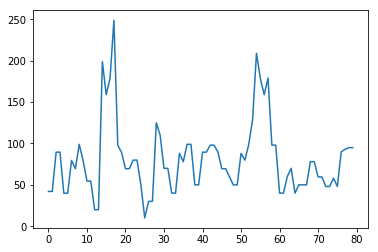

In [65]:
jeans['price'].plot();

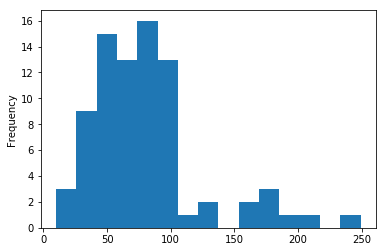

In [66]:
jeans['price'].plot.hist(bins=15);

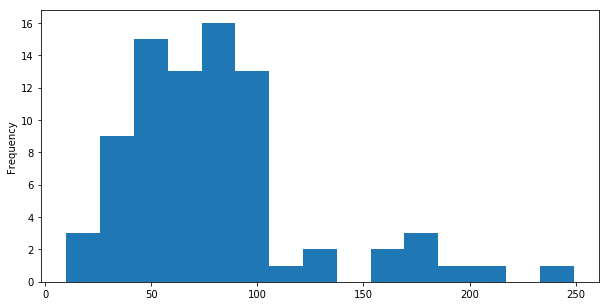

In [67]:
jeans['price'].plot.hist(bins=15,figsize=(10,5));

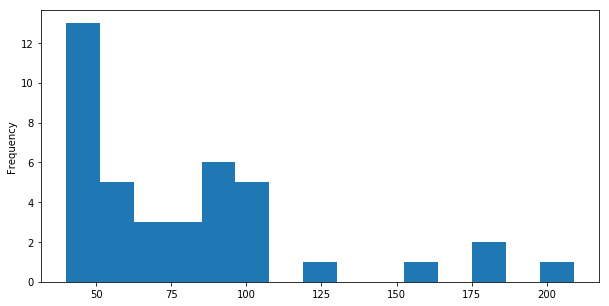

In [68]:
jeans['price'][jeans['menWomen']=='men'].plot.hist(bins=15,figsize=(10,5));

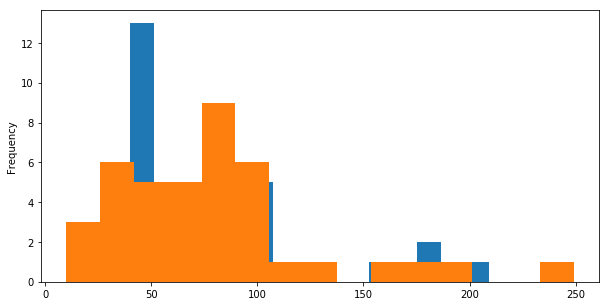

In [69]:
jeans['price'][jeans['menWomen']=='men'].plot.hist(bins=15,figsize=(10,5));
jeans['price'][jeans['menWomen']=='women'].plot.hist(bins=15,figsize=(10,5));

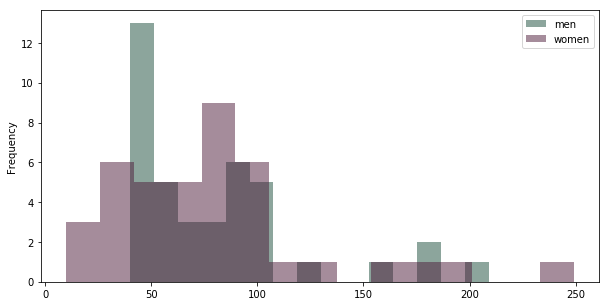

In [70]:
ax = jeans['price'][jeans['menWomen']=='men'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#1A4D3B');
ax = jeans['price'][jeans['menWomen']=='women'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#4D1A39');
ax.legend(['men','women']);

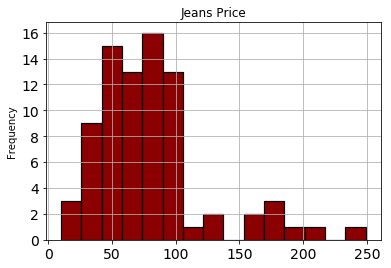

In [71]:
jeans['price'].plot.hist(
    bins=15, 
    title="Jeans Price",
    legend=False,
    fontsize=14,
    grid=True,
    linestyle='-',
    edgecolor='black',
    color='darkred',
    linewidth=1.2);

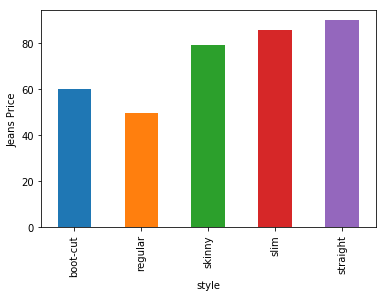

In [72]:
style = jeans['price'].groupby(jeans['style']).mean()
ax=style.plot.bar();
ax.set_ylabel('Jeans Price');

## Seaborn

Seaborn is an easy to use visualisation package that works well with Pandas DataFrames. Below are a few examples, but have a look at the [documentation](https://seaborn.pydata.org/index.html) as there are many more plots you could make. 

In [73]:
import seaborn as sns

/Users/margriet/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


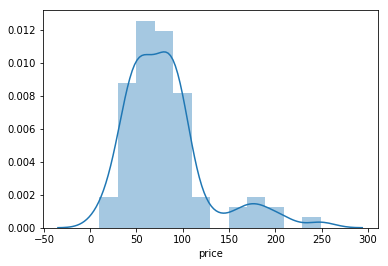

In [74]:
sns.distplot(jeans['price']);

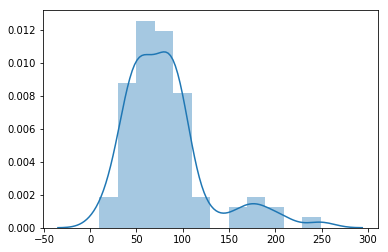

In [97]:
sns.distplot(np.array(jeans['price']));

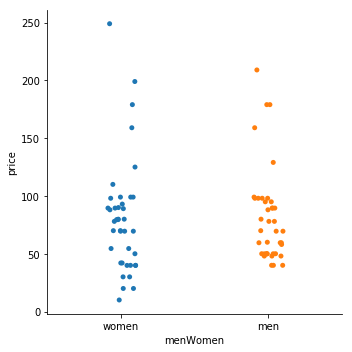

In [75]:
sns.catplot(x='menWomen', y='price', data=jeans);

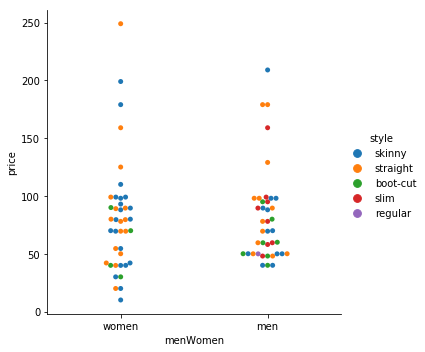

In [76]:
sns.catplot(x='menWomen', y='price', hue='style', kind='swarm', data=jeans);

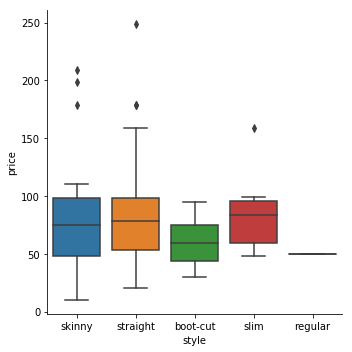

In [77]:
sns.catplot(x="style", y="price", kind="box", data=jeans);


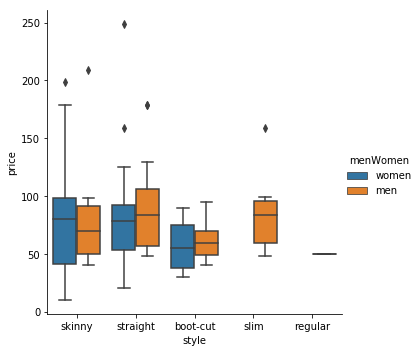

In [78]:
sns.catplot(x="style", y="price", hue="menWomen", kind="box", data=jeans);

<div class="alert alert-success">
 <b>EXERCISE</b>
 <ul>
  <li>Create two histograms that compare the sizes of pockets between men and womens jeans with `.plot.hist()`</li>
  <li>Create a bar plot with the size of the front pockets for men and women with `.plot.bar()`</li>
  <li>Create a bar plot with the size of the front pockets for men and women with `seaborn`</li>
  <li>Customize the way the example or your plots look</li>
 </ul> 
</div>    

 
> Tip: to add two histograms to one plot you can repeat `.plot()` in the same cell 


In [90]:
# histogram front pockets


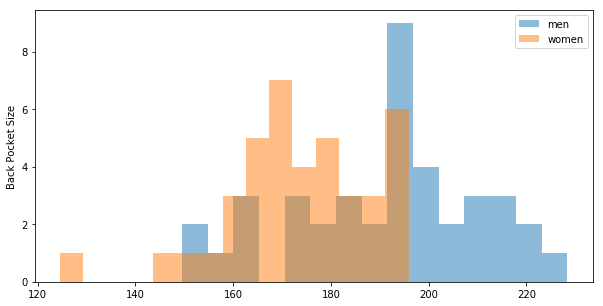

In [89]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer9.py
ax = jeans['BackArea'][jeans['menWomen']=='men'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5);
ax = jeans['BackArea'][jeans['menWomen']=='women'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5);
ax.set_ylabel('Back Pocket Size');
ax.legend(['men','women']);

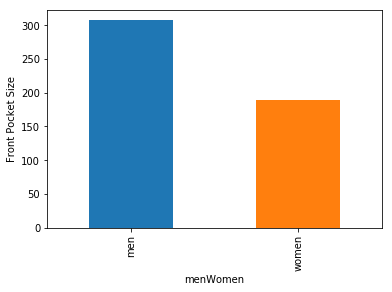

In [91]:
# bar plot back pockets


In [ ]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer10.py
pockets = jeans['FrontArea'].groupby(jeans['menWomen']).mean()
ax = pockets.plot.bar();
ax.set_ylabel('Front Pocket Size');


In [ ]:
# bar plot back pockets (seaborn)


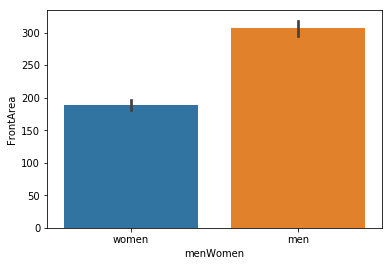

In [94]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/pandas-workshop/master/answers/answer11.py
sns.barplot(x="menWomen", y="FrontArea", data=jeans);

<a id="extra"></a>
# 4. Optional Excercises

If you finish early:

1. Try to create other plots. Have a look at the [Pandas plot examples](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) or the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) for inspiration.  
2. Have a look at these Pandas workshops and book: <br>
2.1. [Pandas workshop by Alexander Hensdorf](https://github.com/alanderex/pydata-pandas-workshop) <br>
2.2. [Pandas tutorial by Joris van den Bossche](https://github.com/jorisvandenbossche/pandas-tutorial) <br>
2.3. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) <br>
3. Try the below excercise
4. Or load one of your own datasets into a notebook and play around with the data to practice what you have learned 

## Extra excercise

A column in the `jeans` data that is containing lots of different variables is `fabric`. Cleaning this up is beyond this introduction workshop. But give it a go. Try to convert this column to columns for each fabric that will contain the percentages as numbers. For this one Google is your friend! (Disclaimer... I also have not figured this one out yet, and will need some googling to find a solution).

In [ ]:
fabric = jeans['fabric']
fabric.head()

First split this into columns:

In [ ]:
fabric = fabric.str.split(expand=True,pat = ",")
fabric.head()

Spelling mistakes can be fixed with `.replace()` 

In [ ]:
fabric = fabric.replace(to_replace=r'polyester', value=' poly', regex=True)
fabric = fabric.replace(to_replace=r'poly', value=' polyester', regex=True)
fabric = fabric.replace(to_replace=r'cottton', value='cotton', regex=True)
fabric.head()

Next steps would be to create new columns for each fabric and then merge these back into the `jeans` DataFrame. Maybe start with something like this:

In [ ]:
fabric['cotton'] = fabric[fabric.apply(lambda x: x.str.contains("cotton").any(), axis=1)]
fabric.head()

In [ ]:
fabric['cotton'] = pd.to_numeric(fabric['cotton'].replace(to_replace=r'% cotton', value='', regex=True))
fabric.head()